## 使用GeoPandas库
GeoPandas是基于Pandas的开源库，专门用于处理地理空间数据。GeoPandas提供了一些高级的地理空间数据处理功能，如空间关系运算、空间距离计算、空间缓冲区分析、空间交集分析等。GeoPandas的主要特点是可以轻松地将地理空间数据读入到Pandas DataFrame中，并对其进行空间分析。

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, Polygon

In [4]:
path_kunming = "E:/YNU/5/OpenSourceGIS/Act_4/OnClass/kunming_wgs84.gpkg"
kunming_gpd = gpd.read_file(path_kunming)
kunming_gpd #.head()

,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry
0,530102,五华区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71331 25.13652, 102.71547 ..."
1,530103,盘龙区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71668 25.04473, 102.71663 ..."
2,530111,官渡区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71717 25.03341, 102.71792 ..."
3,530112,西山区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.50726 24.86019, 102.50689 ..."
4,530113,东川区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.8034 26.30291, 102.80537 2..."
5,530114,呈贡区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.85321 24.69792, 102.85168 ..."
6,530115,晋宁区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.73979 24.81731, 102.74137 ..."
7,530124,富民县,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.63768 25.36767, 102.64085 ..."
8,530125,宜良县,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((103.27379 25.25786, 103.27332 ..."
9,530126,石林彝族自治县,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((103.66655 24.7242, 103.66542 2..."


In [40]:
ids_chenggong = np.where(kunming_gpd['dt_name'] == '呈贡区')[0]
chenggong_gpd = kunming_gpd.iloc[ids_chenggong]

Text(0.5, 1.0, 'chenggong')

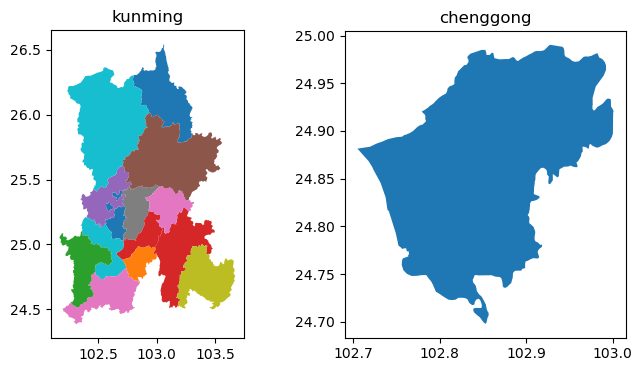

In [41]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
kunming_gpd.plot(ax=ax[0],column='dt_name')
ax[0].set_title('kunming')

chenggong_gpd.plot(ax=ax[1],column='dt_name')
ax[1].set_title('chenggong')

In [42]:
dict = {'name': ['regin1'], 'geometry': [Polygon([(102, 25.0), (102.5, 25.5), (103.0, 25.5), (103.0, 25.0)])]}
region_gpd = gpd.GeoDataFrame(dict, crs='EPSG:4326')
region_gpd

,name,geometry
0,regin1,"POLYGON ((102 25, 102.5 25.5, 103 25.5, 103 25..."


In [43]:
region_clip = kunming_gpd.clip(region_gpd)
region_clip

,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry
13,530181,安宁市,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.22912 25.00018, 102.22813 ..."
3,530112,西山区,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.61244 25.09797, 102.61255 25.097..."
2,530111,官渡区,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.71792 25.03349, 102.71826 25.033..."
0,530102,五华区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71547 25.13724, 102.71801 ..."
7,530124,富民县,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.64085 25.36767, 102.64254 25.367..."
11,530128,禄劝彝族苗族自治县,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.46137 25.43398, 102.46372 25.437..."
1,530103,盘龙区,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.71663 25.04535, 102.71656 25.045..."
10,530127,嵩明县,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.95301 25.25408, 102.94905 ..."
12,530129,寻甸回族彝族自治县,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.99576 25.45974, 102.99413 25.460..."


<Axes: >

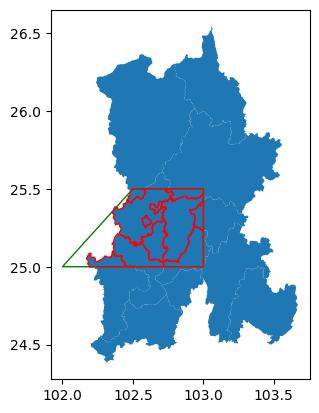

In [44]:
ax = kunming_gpd.plot()
region_gpd.plot(ax=ax, facecolor='none', edgecolor='green')
region_clip.plot(ax=ax, facecolor='none', edgecolor='red')

<Axes: >

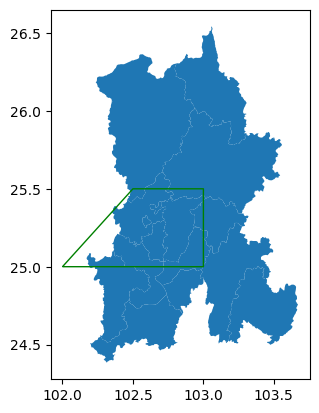

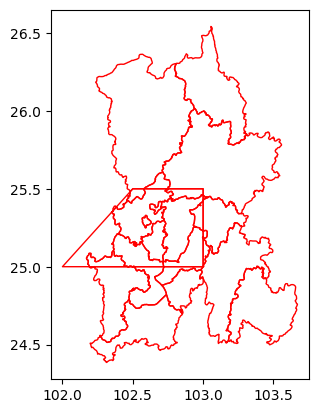

In [45]:
region_union = kunming_gpd.overlay(region_gpd, how='union')
ax = kunming_gpd.plot()
region_gpd.plot(ax=ax, facecolor='none', edgecolor='green')
region_union.plot(facecolor='none', edgecolor='red')

In [46]:
path_kunming_out_1 = 'E:/YNU/5/OpenSourceGIS/Act_6/OnClass/1111.gpkg'
kunming_gpd_1 = kunming_gpd[['dt_name', 'geometry']]
kunming_gpd_1

,dt_name,geometry
0,五华区,"MULTIPOLYGON (((102.71331 25.13652, 102.71547 ..."
1,盘龙区,"MULTIPOLYGON (((102.71668 25.04473, 102.71663 ..."
2,官渡区,"MULTIPOLYGON (((102.71717 25.03341, 102.71792 ..."
3,西山区,"MULTIPOLYGON (((102.50726 24.86019, 102.50689 ..."
4,东川区,"MULTIPOLYGON (((102.8034 26.30291, 102.80537 2..."
5,呈贡区,"MULTIPOLYGON (((102.85321 24.69792, 102.85168 ..."
6,晋宁区,"MULTIPOLYGON (((102.73979 24.81731, 102.74137 ..."
7,富民县,"MULTIPOLYGON (((102.63768 25.36767, 102.64085 ..."
8,宜良县,"MULTIPOLYGON (((103.27379 25.25786, 103.27332 ..."
9,石林彝族自治县,"MULTIPOLYGON (((103.66655 24.7242, 103.66542 2..."


In [47]:
kunming_gpd_1.to_file(path_kunming_out_1)

In [48]:
## 只写出某个要素
path_kunming_out_2 = 'E:/YNU/5/OpenSourceGIS/Act_6/OnClass/2222.gpkg'
kunming_gpd_2 = kunming_gpd.iloc[ids_chenggong]
kunming_gpd_2

,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry
5,530114,呈贡区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.85321 24.69792, 102.85168 ..."


In [49]:
kunming_gpd_2.to_file(path_kunming_out_2)